True
(400, 400)
True
raggio spettrale Gauss-Seidel SOR  0.10000169966865104
raggio spettrale jacobi 0.0
iterazioni Gauss-Seidel-SOR:  13
iterazioni Jacobi:  13


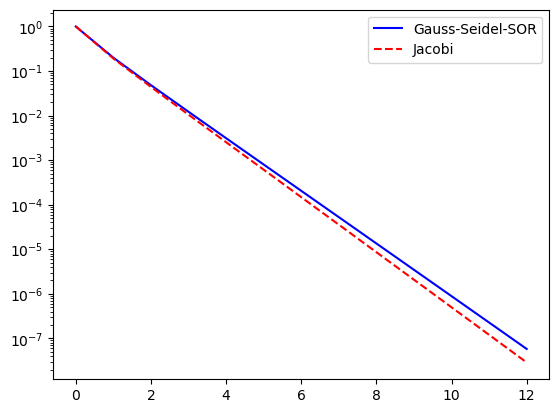

In [47]:
from scipy.io import loadmat
import numpy as np
import numpy.linalg as npl
import scipy as sp
import scipy.linalg as spl
import matplotlib.pyplot as plt
import RisolviSis

dati = loadmat('Test_II.mat')
A = dati["A"]
A = A.astype(float)
b = dati["b"]
b = b.astype(float)

print(sp.linalg.issymmetric(A))
#plt.spy(A)
print(A.shape)
print(np.all(npl.eigvals(A)>0))
#A e' quadrata, di grandi dimensioni, sparsa, simmetrica, definita positiva
#Posso usare i metodi di Jacobi e Gauss-Seidel-SOR e confrontarli.
def gauss_seidel_sor(A,b,x0,toll,it_max,omega):
    errore=1000
    d = np.diag(A)
    D=np.diag(d)
    E= np.tril(A,-1)
    F= np.triu(A,1)
    #Calcolo della matrice di iterazione di Gassu_Seidel SOR
    Momega=D+omega*E
    Nomega=(1-omega)*D-omega*F
    T=np.dot(npl.inv(Momega),Nomega)
    eigv = npl.eigvals(T)
    raggiospettrale= np.max(np.abs(eigv))
    print("raggio spettrale Gauss-Seidel SOR ", raggiospettrale)
    
    M= D+E
    N= -F
    it=0
    xold=x0.copy()
    xnew=x0.copy()
    er_vet=[]
    while it<=it_max and errore>=toll:
        tmp = b - np.dot(F,xold) 
        xtilde,flag = RisolviSis.Lsolve(M,tmp)
        xnew= (1-omega)*xold+omega*xtilde
        errore= npl.norm(xnew - xold) / npl.norm(xnew)
        er_vet.append(errore)
        xold=xnew.copy()
        it=it+1
    return xnew,it,er_vet

def jacobi(A,b,x0,toll,it_max):
    
    errore=1000
    d = np.diag(A)
    M_inv=np.diag(1/d)
    E= np.tril(A,-1)
    F= np.triu(A,1)
    N= -F
    T=np.dot(M_inv,N)
    eigv = npl.eigvals(T)
    raggiospettrale= np.max(np.abs(eigv))
    print("raggio spettrale jacobi", raggiospettrale)
    it=0
     
    er_vet=[]
    while it <= it_max and errore >= toll:
        x=(b + np.dot(N,x0))/d.reshape(A.shape[0],1)
        errore= npl.norm(x - x0)/npl.norm(x)
        er_vet.append(errore)
        x0=x.copy()
        it=it+1
    return x,it,er_vet

x0 = np.zeros((A.shape[0],1))
it_max = 1000
toll = 10e-8
omega = 1.1
x_sor,it_sor,err_sor = gauss_seidel_sor(A,b,x0,toll,it_max,omega)
x_j, it_j, err_j = jacobi(A,b,x0,toll,it_max)
print("iterazioni Gauss-Seidel-SOR: ",it_sor)
print("iterazioni Jacobi: ",it_j)
plt.semilogy(np.arange(it_sor),err_sor,'b-',np.arange(it_j),err_j,'r--')
plt.legend(["Gauss-Seidel-SOR","Jacobi"])
plt.show()

#Entrambi i metodi sono sufficientemente precisi e adatti alla soluzione del problema.

4.663457775986456
(5, 2)


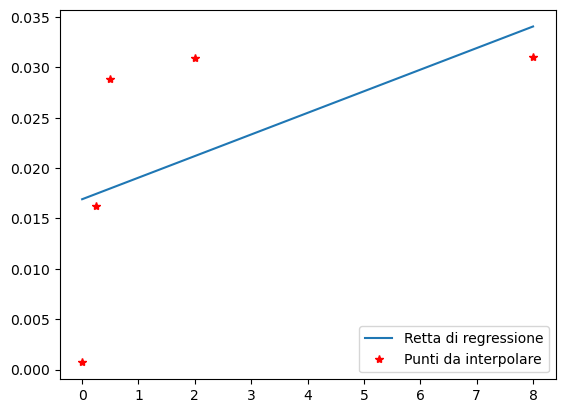

0.0004848327762313228


In [49]:
x = np.array([0.0004,0.2507,0.5008,2.0007,8.0013])
y = np.array([0.0007,0.0162,0.0288,0.0309,0.0310])

m = x.shape[0]
n = 1 #Retta di regressione di grado 1
n1 = n+1 #gradi di liberta'
A = np.vander(x,increasing=True)[:,:n1]
print(npl.cond(A))
print(A.shape)
#A e' ben condizionata, posso usare il metodo delle eq. normali per risolvere il
# sistema nel senso dei minimi quadrati.
def eqnorm(A,b):
#Soluzione di un sistema sovradeterminato facendo uso delle equazioni normali
    G=A.T@A
    f= A.T@b
    L= spl.cholesky(G,lower=True)
    y,flag = RisolviSis.Lsolve(L,f)
    if flag == 0:
        x,flag = RisolviSis.Usolve(L.T,y)
     
    return x
alpha = eqnorm(A,y)
xx = np.linspace(np.min(x),np.max(x),100)
pol = np.polyval(np.flip(alpha),xx)
plt.plot(xx,pol,x,y,'r*')
plt.legend(["Retta di regressione","Punti da interpolare"])
plt.show()
errore = npl.norm(y - np.polyval(np.flip(alpha),x))**2
print(errore)

65.67493525624782


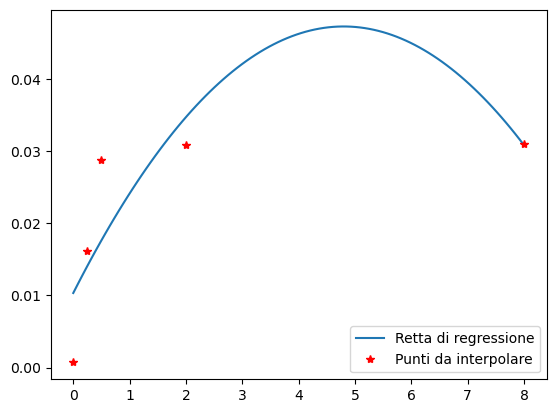

Errore: 0.00023646355940249895


In [53]:
n = 2 #Parabola grado 2
n1 = n+1
A = np.vander(x,increasing=True)[:,:n1]
print(npl.cond(A))
#A e' ben condizionata, posso usare il metodo dei minimi quadrati (qrLS)
#Soluzione di un sistema sovradeterminato facendo uso della fattorizzazione QR    
def qrLS(A,b):
    n=A.shape[1]  # numero di colonne di A
    #Calcola la fattorizzazione QR di A e utilizzala per calcolare
    #la soluzione nel senso dei minimi quadrati di Ax=b
    Q,R = spl.qr(A)
    h = Q.T@b
    x,flag = RisolviSis.Usolve(R[:n,:],h[:n])
    residuo = npl.norm(h[n:])**2
    return x,residuo

alpha,res = qrLS(A,y)
xx = np.linspace(np.min(x),np.max(x),100)
pol = np.polyval(np.flip(alpha),xx)
plt.plot(xx,pol,x,y,'r*')
plt.legend(["Retta di regressione","Punti da interpolare"])
plt.show()
print("Errore:",res)
